<a href="https://colab.research.google.com/github/sihamone/sihamone/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [ ]:
# Revisa la documentacion de python para poder instalar tensorflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


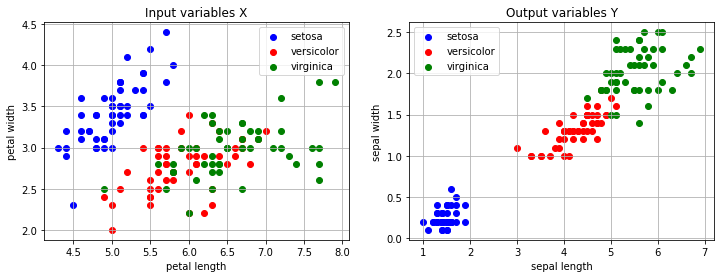

In [ ]:
# Load and split data
from sklearn.datasets import load_iris
iris = load_iris()

# We will use length and width of petals as X to predict length and width of sepals as Y
# We also keep the labels in a vector L, only for visualzation purposes
X = iris.data[:, :2] # tome las primeras dos variables
Y = iris.data[:, 2:] #tome las siguientes 2 variables
#se trata de pronosticar las características del sepalo en función de las del petalo.
L = iris.target #datos originales

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# Plot it
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

#regresión múltiple
# pronosticar concoiendo los valores del petalo queremos aproximar los valores del sepalo
# Se ve el gráfico de los datos que vamos a meter (el width y length del pétalo)
# y los datos de salida (que sería el pronóstico del sépalo)

In [ ]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.15)
#permite que le pasemos tres argumentos... los datos de entrada y las divido entre 15% y 85%
#15% de los 200 datos son para el Test y 85% son para Training y validación
print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (127, 2)
Test inputs X: (23, 2)
Training + validation outputs Y: (127, 2)
Test outputs Y: (23, 2)
Training + validation labels l: (127,)
Test labels l: (23,)


In [ ]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/
# Tensorflow está usada para deep learning que tiene estructura tipo capa, optimizadores
# conoce funciones de activación y respectivas derivadas para no calcularlas.
# a partir de la 2nda sesión de tensorflow ya incluía a keras
# tensorflow keras tiene unos modulos : en este caso models y layers (layer tipo input
# (que son los cuadritos de la x1 y x2), luego tenemos la casa dense (cajas de perceptrones))

In [ ]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
# MLP: multiple layer perceptron: es el dibujito con los perceptrons, inputs y outputs
i = Input(shape=(2,), name='input') #una capa, de longitud 2
o = Dense(units=2, activation=None, name='output')(i) #creo una capa tipo dense, tiene
#dos placeholders de entrada y dos perceptrones, None es que solo hace combinaciones lineales
#si lo cambias por "sigmoid" pues ahora sería no lineal
#las dos neuronas serán lineales

MLP = Model(inputs=i, outputs=o) #voy a construir un modelo con entras input i y salidas output o
MLP.summary() # Me imprime el resumen
#tu salida es de longitud dos
#(None,2) solo sabe que debe contener vectors de longitud 2
#tmb nos muestra el numero de parametros
#son los pesos y los bias de cada entrada (omega1 omega2 bias1 y omega3, omega4 bias2) solo hay dos capas


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights() #la capa 1 es la que tiene los pesos (dame los pesos) y los guardo en omega y biases
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)
#los w1 los inicializa con una distriubci´n uniforme +-.5
#y los b1 se inicializan en 0

Initial weights: (2, 2)
[[ 0.14523506  0.24323845]
 [-1.1333405   0.2525636 ]]
Initial biases (2,)
[0. 0.]


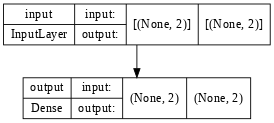

In [ ]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# Here we define the optimizer and loss function
# Adam and mse in this initial example
MLP.compile(optimizer='sgd', loss='mse')
#compilarlo en tensorflow=> es asignarle hiperparámetros para optimizarlo para entrenarlo
#vamos a utilizar stockastic gradient descente, y loss= mean square error (función de costo)

In [ ]:
# And now we train the model
# Learn to predict sepal's lenght and width from petal's lenght and width
HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, validation_split=0.2)
#la función fit espera las x(alto y ancho del petalo), y (ancho y alto del sepalo), lotes de tamaño=4, epocas=100
# toma el 20% para hacer validación
# va a tomar 80% para el entrenamiento (forward pass, errores, y para ir ajustando los parametros...)
#al terminar la epoca utilizmos el 20% para hacer el forward pass, solo es monitoreo
#los de validación solo es para comparar

# en la epoca 1 de 100, 26/26 es el número de batches para completar el numero de datos
# depende del batch size, se tarda 7milisegundos en cada paso, el mean square error es 2.71
#y el validation es 2.8. Pareciera que sí lo está haciendo bien
# el mean square error : es la ye esperada y la y pronosticada. Es la suma de los mean square error


Epoch 1/100
26/26 [==============================] - 1s 7ms/step - loss: 2.0599 - val_loss: 0.8912
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6882 - val_loss: 0.6211
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6402 - val_loss: 0.8560
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6172 - val_loss: 0.5489
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5635 - val_loss: 0.4749
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5240 - val_loss: 0.5332
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5091 - val_loss: 0.5286
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4600 - val_loss: 0.4648
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4518 - val_loss: 0.4436
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4236 - val_loss: 0.3947
Epoch 11/

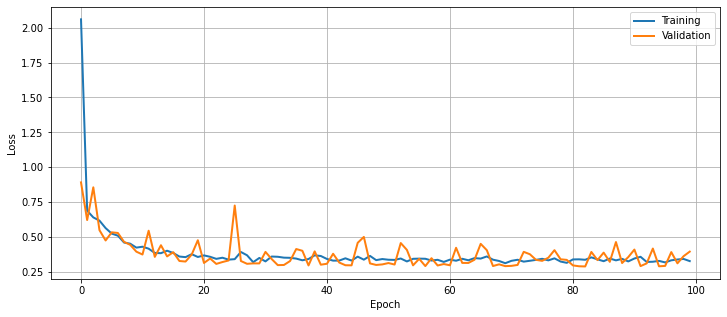

In [ ]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
# muestra como va mejorando el desempeño de  training y validation
# si la validation se subiera y no se acercara al training entonces eso sería un overfitting
#entre mas se ajusta a los de entrenamiento más se desajustan de los de 20% de validación
# si pasa necesitamos más capas u otra funci´n de activación
# si no sabe que pedo con los 20% significa que no puede generalizar


# del 80% toma 4 y hace todo el proceso y luego los valida y así hasta que se acaba la epoca

In [ ]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights() #ahora como se vieron los pesos despues del entrenamiento
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.5596906   0.58787155]
 [-1.6727446  -0.6733025 ]]
Initial biases (2,)
[-0.51907444 -0.4130591 ]


In [ ]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)
#le voy a pasar ese 15% desde el principio
#el set test que no se utiliza en en validación ni entrenamiento
# en el test tengo .48 sí hay overfitting es casi el doble

0.41150715947151184

In [ ]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)
#no evalua es la función cuando quieres clasificar o en regresión para predecir

(23, 2)


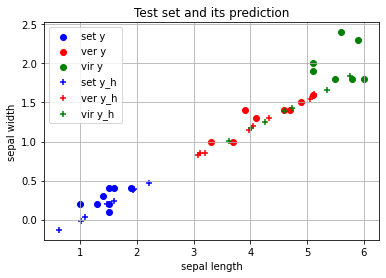

In [ ]:
 # Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')
#grafico los y test reales y ytest hat
plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()
#las verdes las pronostica como rojas (ahí se está equivocando)
# el verde le cuesta trabajo

In [ ]:
# Create a larger MLP
i = Input(shape=(2,), name='input') #recibe un vector de longitud 2
h = Dense(units=32, activation='relu', name='hidden1')(i) #4 capas intermedias y conecta una con otra
h = Dense(units=64, activation='relu', name='hidden2')(h) #por lo general las capas intermedias tienen la misma activación relu
h = Dense(units=32, activation='relu', name='hidden3')(h)
o = Dense(units=2, activation='linear', name='output')(h)
#4 capas con units=32 número de neuronas
#activación tipo relu que puede ser sigmoide
#activation= linear ahora si tenemos la salida lineal
#Elnúmero de capas y el número de unidades de neurónas son hiperparámetros
# el primer dense se va a aplicar al objeto i
#luego el siguiente dense se va a aplicar al objeto h y se le vuelve a asignar a h
#son hs designadas a h
MLP = Model(inputs=i, outputs=o) #aquí creamos el modelo
MLP.summary()
# los parámetros de la última capa son 66,... son los pesos en cada capa
# s(w2 *s(w1*x))
#teine 96 parámetros el vector w1, 2112 son los paráemtros en w2
#el número de perceptrones son el número de unidades anteiror*#de unidades actual + #de unidades actual

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden1 (Dense)             (None, 32)                96        
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse') # queremos optimiar la función de costo

In [ ]:
# Train it
MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, verbose=2, validation_split=0.1)
#xtrain y ytrain los datos de entrenamiento
#aparte 10% para validación,... le sobran 120 y esos 120 los va a dividir en 4 lotes... por lo tanto hay 26 en cada lote, eso lo hace 100 épocas
#por cada época hace 29 uptades
#para cada época van a ser nuevos batches
#29 *4354 son el número de updates


Epoch 1/100
29/29 - 1s - loss: 1.7802 - val_loss: 4.2113 - 1s/epoch - 51ms/step
Epoch 2/100
29/29 - 0s - loss: 1.2041 - val_loss: 2.2117 - 122ms/epoch - 4ms/step
Epoch 3/100
29/29 - 0s - loss: 0.7788 - val_loss: 3.1000 - 110ms/epoch - 4ms/step
Epoch 4/100
29/29 - 0s - loss: 0.6650 - val_loss: 0.3437 - 122ms/epoch - 4ms/step
Epoch 5/100
29/29 - 0s - loss: 0.5488 - val_loss: 0.3591 - 117ms/epoch - 4ms/step
Epoch 6/100
29/29 - 0s - loss: 0.5066 - val_loss: 0.2978 - 93ms/epoch - 3ms/step
Epoch 7/100
29/29 - 0s - loss: 0.5754 - val_loss: 0.2909 - 110ms/epoch - 4ms/step
Epoch 8/100
29/29 - 0s - loss: 0.5644 - val_loss: 0.4631 - 99ms/epoch - 3ms/step
Epoch 9/100
29/29 - 0s - loss: 0.5956 - val_loss: 0.2412 - 123ms/epoch - 4ms/step
Epoch 10/100
29/29 - 0s - loss: 0.6501 - val_loss: 0.2741 - 84ms/epoch - 3ms/step
Epoch 11/100
29/29 - 0s - loss: 0.3709 - val_loss: 0.2114 - 97ms/epoch - 3ms/step
Epoch 12/100
29/29 - 0s - loss: 0.3350 - val_loss: 0.8016 - 93ms/epoch - 3ms/step
Epoch 13/100
29/29 -

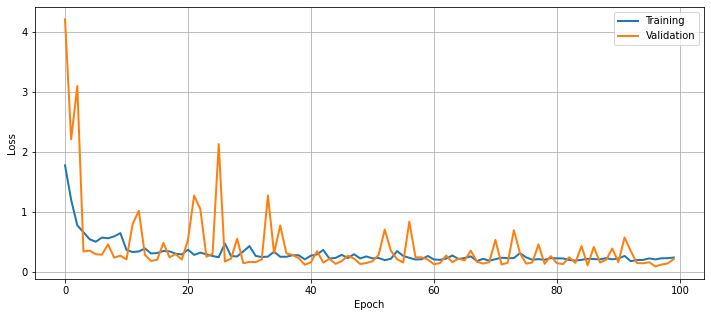

In [ ]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
#es un modelo menos estable

In [ ]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t') #print(w)
  print("Biases:  ", b.shape) #print(b)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


In [ ]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.21793922781944275

In [ ]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(23, 2)


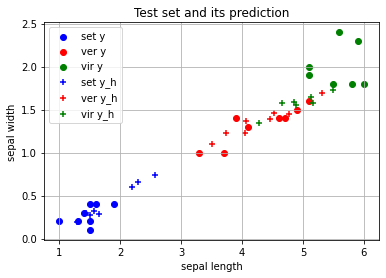

In [ ]:
# Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()
#yyyy predije mejor

In [ ]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

In [ ]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((10, 2))
for ind in range(10):
  MLP = create_MLP([2, 32, 16, 8, 2], activations='sigmoid', last_activation='relu')
  MLP.compile(optimizer='sgd', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=0, validation_split=0.2)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

Run   1 -- Train loss: 8.9401; Test loss: 8.6449
Run   2 -- Train loss: 1.7538; Test loss: 1.7353
Run   3 -- Train loss: 8.9422; Test loss: 8.6465
Run   4 -- Train loss: 2.5046; Test loss: 2.4356
Run   5 -- Train loss: 1.7251; Test loss: 1.7021
Run   6 -- Train loss: 8.9404; Test loss: 8.6454
Run   7 -- Train loss: 9.6695; Test loss: 9.3257
Run   8 -- Train loss: 1.7664; Test loss: 1.7502
Run   9 -- Train loss: 8.9383; Test loss: 8.6428
Run  10 -- Train loss: 2.3453; Test loss: 2.2768
Average --  train loss: 5.5526 +- 3.5475;  test loss: 5.3805 +- 3.4131


# Challenge

In [ ]:
# Crea un modelo que tome las 4 variables de X como entrada, y pueda pronosticar
# las etiquetas para las clases versicolor y virginica. Puedes hacerlo tan
# profundo como sea necesario, y con tantas neuronas como requieras. Recuerda
# dividir los datos en set de entrenamiento, validación, y prueba, y reportar el
# desempeño para los tres sets.